# 3.2. Objected-Oriented Design for Implementation

$\renewcommand{\mb}{\mathbf}$

In [7]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

**Object-oriented programming**
- Class: a blueprint for creating objects
    - Attributes: data fields
    - Methods: functions
    - Constructor: a special method to initialize an object
    - Inheritance: a class can inherit attributes and methods from another class
- Object: an instance of a class

In [8]:
class Animal: # class definition
    def __init__(self, name): # constructor
        self.name = name # attribute

    def say(self): # method
        print(f'I am {self.name}!') 

class Dog(Animal): # inheritance from Animal
    def say(self): # overriding parent method
        print(f'I am {self.name} and I am a dog!')

dog = Dog('Cherry') # instance of Dog
dog.say() # I am Cherry and I am a dog!
dog.name = 'Charlie' # changing attribute
dog.say() # I am Charlie and I am a dog!

dog2 = Dog('Bobby') # another instance of Dog
dog2.say() # I am Bobby and I am a dog!


I am Cherry and I am a dog!
I am Charlie and I am a dog!
I am Bobby and I am a dog!


## d2l Utilities

d2l implements a few useful utilities in d2l package.

### 1. @d2l.add_to_class()

In [9]:
# adding a new method to class after definition
class A:
    def __init__(self):
        self.name = 'A'

a = A()

In [11]:
@d2l.add_to_class(A)
def do(self):
    print(f'I am {self.name}!')

a.do()

I am A!


### 2. HyperParameters class

`HyperParameters` class saves all agruments to __init__ method as class attributes.

Method `save_hyperparameters` saves all hyperparameters to a json file.

You can extend this class as follows:

In [ ]:
class B(d2l.HyperParameters):
    def __init__(self, a, b, c): 
        self.save_hyperparameters(ignore=['c'])
        print(f'self.a = {self.a}, self.b = {self.b}, self.c = {c}')
        print(f'Do I have self.c? {hasattr(self, "c")}')

b = B(a=1, b=2, c=3) # c will be ignored

self.a = 1, self.b = 2, self.c = 3
Do I have self.c? False


### 3. ProgressBoard

Interface:

```python
class ProgressBoard(d2l.HyperParameters):  #@save
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented
```

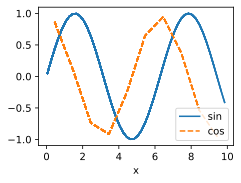

In [16]:
# Example of ProgressBoard

board = d2l.ProgressBoard('x')
for x in np.arange(0,10,0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)


## Common classes in d2l
- API Reference: https://d2l.ai/chapter_appendix-tools-for-deep-learning/d2l.html#classes
- Full implementation (d2l.torch): https://github.com/d2l-ai/d2l-en/blob/master/d2l/torch.py

### 1. Module

- `__init__`: stores the learnable parameters
- `training_step`: accepts a data batch and returns the loss value
- `configure_optimizers`: returns the optimization method
- (optional) `validation_step`: report the evaluation measures.

<nop/> <div style="width: 800px;"> 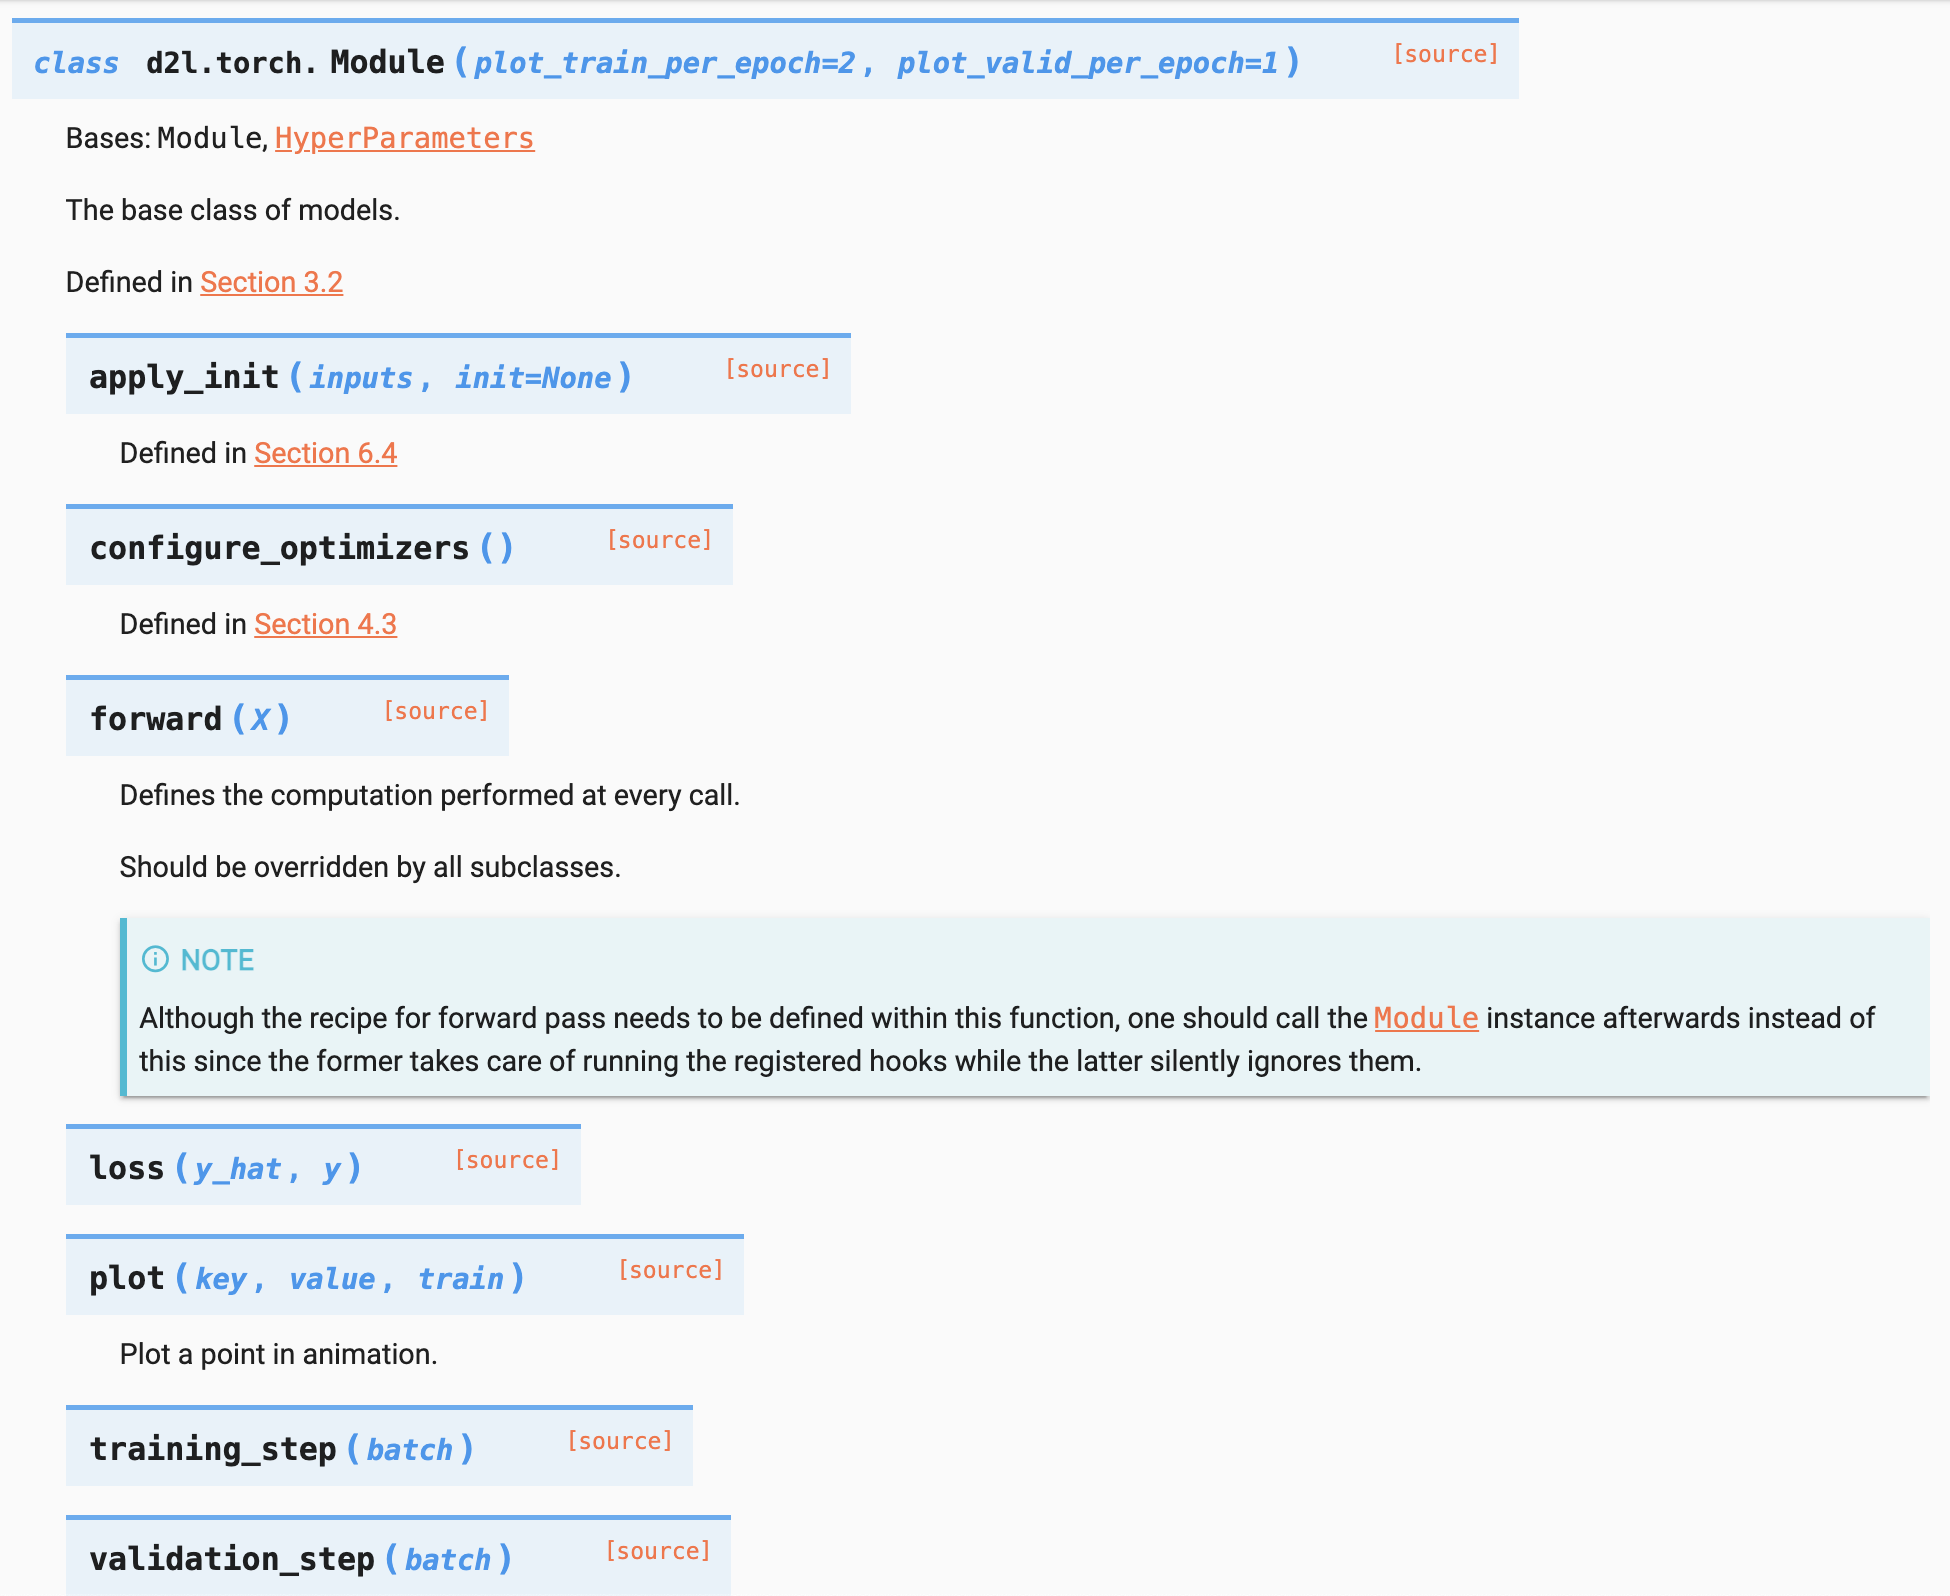 </div>


### 2. DataModule
Base class for data.

- `__init__`: prepare data
- `train_dataloader`: return the training data loader 
- `val_dataloader`: return the validation data loader
- `get_dataloader`: return the data loader

<nop/> <div style="width: 800px;"> 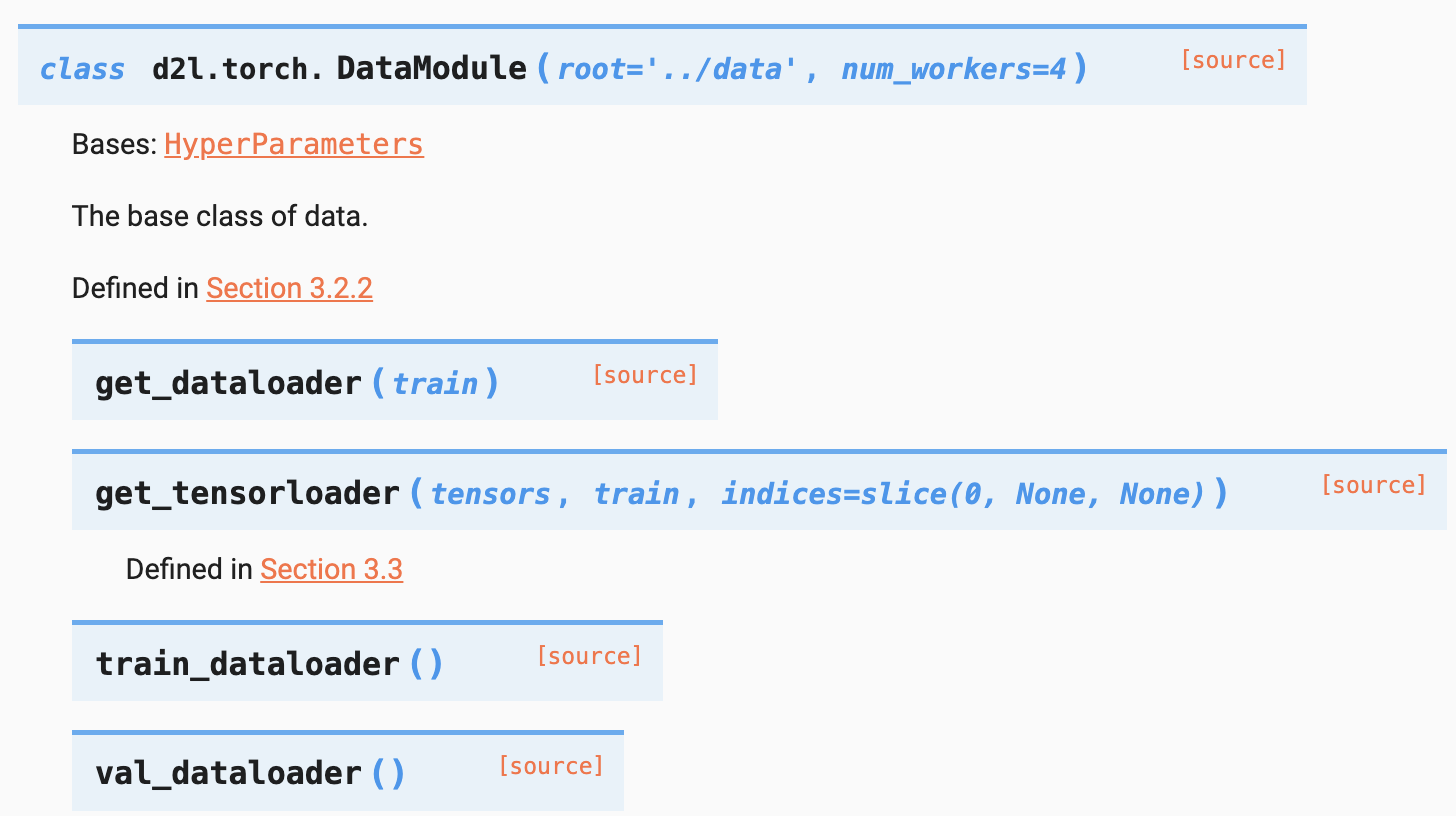 </div>

### 3. Trainer

Trains the model (Module) with the data (DataModule).
- `prepare_data`: prepare data
- `fit`: train the model

`max_epochs` is the maximum number of epochs to train the model.

<nop/> <div style="width: 800px;"> 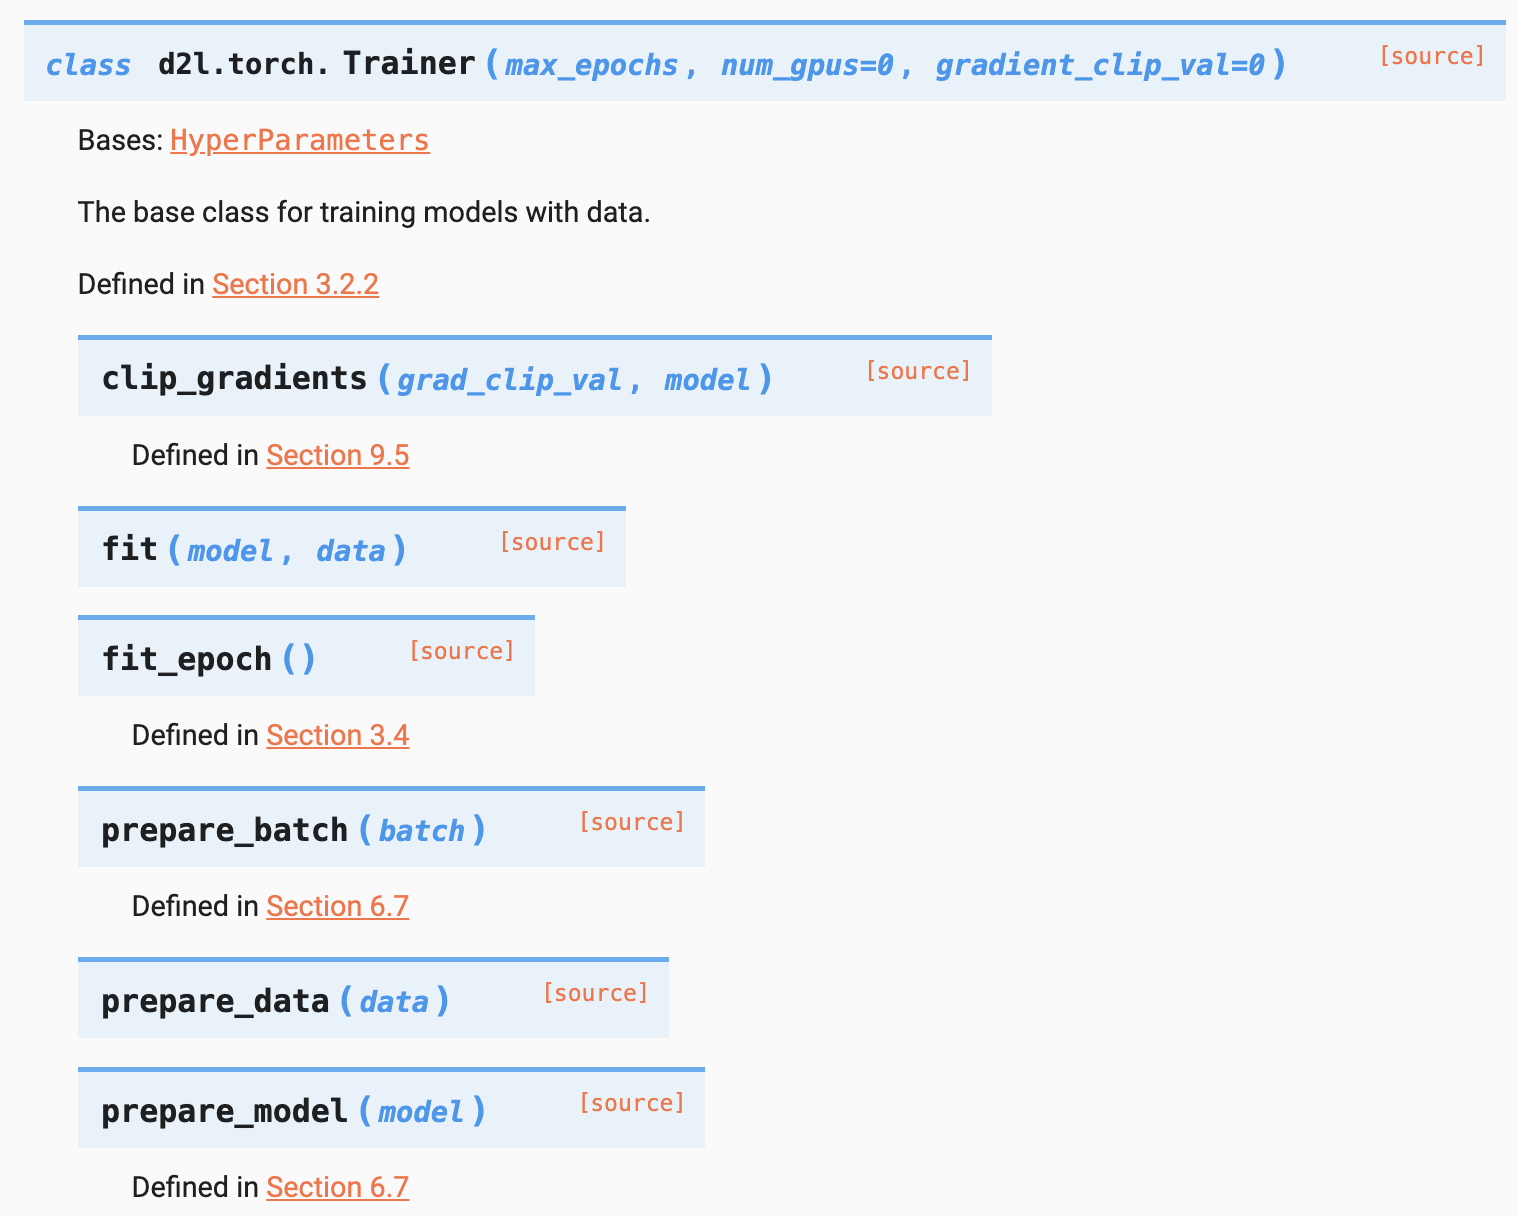 </div>